2015 936
2016 993
2017 443


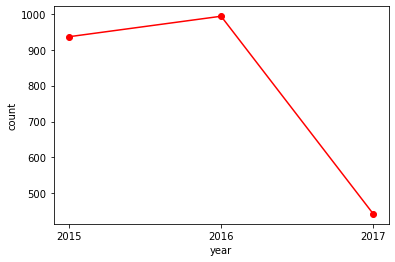

In [3]:
# Open and read data file as specified in the question
# Print the required output in given format
#Total number of fundings done in each year.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data=pd.read_csv(r'C:\Users\digvijaysingh.singh\Downloads\startup_funding.csv',encoding="utf8")
df=data.copy()
#replace defaulted values
df['Date'] = df['Date'].replace(['12/05.2015'],'12/05/2015')
df['Date'] = df['Date'].replace(['15/01.2015'],'15/01/2015')
df['Date'] = df['Date'].replace(['22/01//2015'],'22/01/2015')
df['Date'] = df['Date'].replace(['13/04.2015'],'13/04/2015')
#take those rows only which have amount entry
df.AmountInUSD.fillna('0',inplace=True)
year=df.Date.str.split("/",expand=True)[2]
year_count=year.value_counts()
#sort the index
year_count.sort_index(inplace=True)
year_count_list=[]
for i in range(len(year_count.index)):
    print(year_count.index[i],int(year_count[i]))
    year_count_list.append(year_count[i])

#to plot the graph
plt.plot(year_count.index,year_count_list,"ro-")
plt.xlabel("year")
plt.ylabel("count")
plt.show()

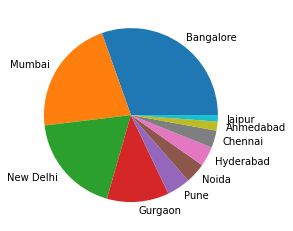

Bangalore 635
Mumbai 449
New Delhi 389
Gurgaon 241
Pune 91
Noida 79
Hyderabad 77
Chennai 67
Ahmedabad 35
Jaipur 25


In [5]:
#Find top 10 Indian cities which have most number of startups ?
import pandas as pd
import matplotlib.pyplot as plt

data=pd.read_csv(r'C:\Users\digvijaysingh.singh\Downloads\startup_funding.csv',encoding="utf8")

df = data.copy()

df.CityLocation.replace('Delhi','New Delhi', inplace = True)
df.CityLocation.replace('bangalore','Bangalore', inplace = True)
cities = df['CityLocation']

cities.dropna(inplace = True)

def valid_city(city):
    city = str(city)
    if city != "":
        return city.split('/')[0].strip()
cities = cities.apply(valid_city)

li = cities.value_counts()
sizes = li[:10]  # [li.iloc[i] for i in range(10)]
names = li.index[:10] # [li.index[i] for i in range(10)]

plt.pie(sizes,labels=names)
plt.show()
for i in range(10):
    print(names[i],sizes[i])



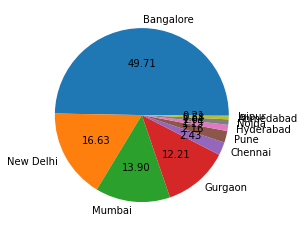

Bangalore 49.71
New Delhi 16.63
Mumbai 13.90
Gurgaon 12.21
Chennai 2.43
Pune 2.16
Hyderabad 1.15
Noida 1.01
Ahmedabad 0.58
Jaipur 0.21


In [6]:
#Find top 10 Indian cities with most amount of fundings received. Find out percentage of funding each city has got (among top 10 Indian cities only).
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data=pd.read_csv(r'C:\Users\digvijaysingh.singh\Downloads\startup_funding.csv',encoding="utf8")

df = data.copy()

df.CityLocation.replace('Delhi','New Delhi',inplace=True)
df.CityLocation.replace('bangalore','Bangalore',inplace=True)

df.dropna(subset = ['CityLocation'] , inplace = True)
df.CityLocation = df.CityLocation.apply(lambda x: x.split('/')[0].strip())

df.AmountInUSD = df.AmountInUSD.apply(lambda x: float(str(x).replace("," , "")))

df = df.groupby('CityLocation')['AmountInUSD'].sum()
df = df.sort_values(ascending = False)

city = df.index[:10]
amount = df.iloc[:10]    # or df.values[:10] or df.[:10]

plt.pie(amount,labels = city,autopct='%0.2f')
plt.show()

percent = np.true_divide(amount,amount.sum())*100

for i in range(10):
    print(city[i]  , format(percent[i] , '.2f'))





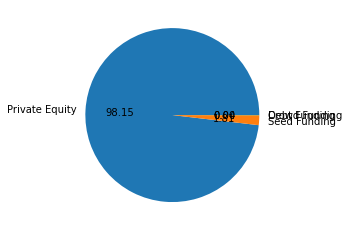

Private Equity 98.15
Seed Funding 1.81
Debt Funding 0.04
Crowd Funding 0.00


In [2]:
#Print the investment type and percentage of amount funded with 2 decimal places after rounding off.
# Open and read data file as specified in the question
# Print the required output in given format
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data=pd.read_csv(r'C:\Users\digvijaysingh.singh\Downloads\startup_funding.csv',encoding="utf8")
df=data.copy()
df.InvestmentType.replace('SeedFunding','Seed Funding',inplace=True)
df.InvestmentType.replace('PrivateEquity','Private Equity',inplace=True)
df.InvestmentType.replace('Crowd funding','Crowd Funding',inplace=True)

df.AmountInUSD = df.AmountInUSD.apply(lambda x: float(str(x).replace("," , "")))

df=df.groupby('InvestmentType')['AmountInUSD'].sum()

df=df.sort_values(ascending=False)

investment_type=df.index
amount=df.values
plt.pie(amount,labels = investment_type,autopct='%0.2f')
plt.show()

percent=np.true_divide(amount,np.sum(amount))*100 #we can also use amount.sum() in place of np.sum(amount)

for i in range(4):
    print(investment_type[i]  , format(percent[i] , '.2f'))

In [12]:
# Open and read data file as specified in the question
# Print the required output in given format
#Top 5 industries and percentage of the total amount funded to that industry. (among top 5 only)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data=pd.read_csv(r'C:\Users\digvijaysingh.singh\Downloads\startup_funding.csv',encoding="utf8")
df=data.copy()

df.IndustryVertical.replace("eCommerce","Ecommerce",inplace=True)
df.IndustryVertical.replace("ECommerce","Ecommerce",inplace=True)

#df.dropna(subset=['IndustryVertical'],inplace=True)

df.AmountInUSD=df.AmountInUSD.apply(lambda x: float(str(x).replace("," , "")))

df=df.groupby('IndustryVertical')['AmountInUSD'].sum()

df=df.sort_values(ascending=False)

amount=df.values[:5]

percent=np.true_divide(amount,np.sum(amount))*100

for i in range(5):
    print(df.index[i],format(percent[i] , '.2f'))
    
    

"""
import pandas as pd
import numpy as np

data=pd.read_csv(r'C:\Users\digvijaysingh.singh\Downloads\startup_funding.csv',encoding="utf8")
# df.IndustryVertical.dropna(inplace=True)

df['IndustryVertical'].replace("ECommerce","Ecommerce",inplace=True)
df['IndustryVertical'].replace("ecommerce","Ecommerce",inplace=True)
df.IndustryVertical.replace('eCommerce','Ecommerce',inplace=True)
df.AmountInUSD = df.AmountInUSD.apply(lambda x: float(str(x).replace(',','')))

industry = df.groupby('IndustryVertical')['AmountInUSD'].sum().sort_values(ascending=False)[0:5]



indus = industry.index
value = industry.values

total = sum(value)
for i in range(len(indus)):
    print(indus[i], format(((value[i]/total)*100),'.2f'))
""""
    


Ecommerce 40.52
Consumer Internet 35.96
Technology 10.45
Online Marketplace 6.63
E-Commerce & M-Commerce platform 6.44


In [13]:
# Open and read data file as specified in the question
# Print the required output in given format
#Find top 5 startups with most amount of total funding.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data=pd.read_csv(r'C:\Users\digvijaysingh.singh\Downloads\startup_funding.csv',encoding="utf8")
df=data.copy()

df.StartupName.replace("Ola Cabs","Ola",inplace=True)
df.StartupName.replace("Olacabs","Ola",inplace=True)
df.StartupName.replace("OyoRooms","Oyo",inplace=True)
df.StartupName.replace("OYO Rooms","Oyo",inplace=True)
df.StartupName.replace("Oyo Rooms","Oyo",inplace=True)
df.StartupName.replace("Oyorooms","Oyo",inplace=True)
df.StartupName.replace("Flipkart.com","Flipkart",inplace=True)
df.StartupName.replace("Paytm Marketplace","Paytm",inplace=True)



df.AmountInUSD=df.AmountInUSD.apply(lambda x: float(str(x).replace("," , "")))

df=df.groupby('StartupName')['AmountInUSD'].sum()

df=df.sort_values(ascending=False)

names=df.index[:5]

for i in names:
    print(i)


Paytm
Flipkart
Ola
Snapdeal
Oyo


In [14]:
# Open and read data file as specified in the question
# Print the required output in given format
# Find the top 5 startups who received the most number of funding rounds. That means, startups which got fundings maximum number of times.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data=pd.read_csv(r'C:\Users\digvijaysingh.singh\Downloads\startup_funding.csv',encoding="utf8")
df=data.copy()

df.StartupName.replace("Ola Cabs","Ola",inplace=True)
df.StartupName.replace("Olacabs","Ola",inplace=True)
df.StartupName.replace("OyoRooms","Oyo",inplace=True)
df.StartupName.replace("OYO Rooms","Oyo",inplace=True)
df.StartupName.replace("Oyo Rooms","Oyo",inplace=True)
df.StartupName.replace("Oyorooms","Oyo",inplace=True)
df.StartupName.replace("Flipkart.com","Flipkart",inplace=True)
df.StartupName.replace("Paytm Marketplace","Paytm",inplace=True)

a=df.StartupName.value_counts()
dict=a.to_dict()

i=0
for key in dict.keys():
    if i==5:
        break
    else:
        print(key,int(dict[key]))
    i+=1

Ola 9
Swiggy 7
UrbanClap 6
Oyo 6
Paytm 6


In [15]:
# Open and read data file as specified in the question
# Print the required output in given format
# Find the Investors who have invested maximum number of times.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data=pd.read_csv(r'C:\Users\digvijaysingh.singh\Downloads\startup_funding.csv',encoding="utf8")
df=data.copy()

#drop undisclosed investors
df=df[df.InvestorsName!='Undisclosed Investors']
df=df[df.InvestorsName!='Undisclosed investors']

#we will usse 11 pandas.Series.str.split() with regular expression and pandas.Series.explode().
df['InvestorsName'] = df['InvestorsName'].str.split(',')
df = df.explode('InvestorsName').reset_index(drop=True)

#now remove extra spaces
df.InvestorsName=df.InvestorsName.str.strip()

#df.InvestorsName.strip(inplace=True)
# what we have done here is we have splited the investers column value 
# to form new rows
#now firstly we will drop rows having nan values
df.dropna(subset=['InvestorsName'],inplace=True)

df=df[df.InvestorsName!='']

a=df.InvestorsName.value_counts()

print(a.index[0],int(a[0]))

Sequoia Capital 64


## Question no.1

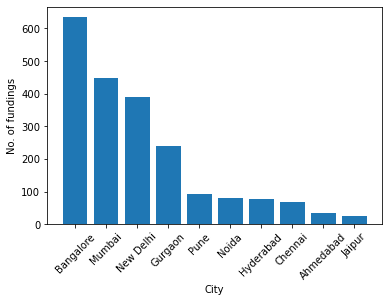

Bangalore 635


In [166]:
import pandas as pd
import matplotlib.pyplot as plt

data=pd.read_csv(r'C:\Users\digvijaysingh.singh\Downloads\startup_funding.csv',encoding="utf8")

df = data.copy()
# replacing the city names with correct one
df.CityLocation.replace('Delhi','New Delhi', inplace = True)
df.CityLocation.replace('bangalore','Bangalore', inplace = True)
cities = df['CityLocation']

#drop the values which has city values as NaN
cities.dropna(inplace = True)

cities=cities.apply(lambda x: x.split('/')[0].strip())

li = cities.value_counts()
sizes = li[:10]  #[li.iloc[i] for i in range(10)]
names = li.index[:10] #[li.index[i] for i in range(10)]

#to plot the graph
plt.bar(names,sizes)
plt.xticks(rotation=45)
plt.xlabel("City")
plt.ylabel("No. of fundings")
plt.show()
    
#so city wih maximum no of fundings is Bangalore
print(names[0],sizes[0])

## Question no. 2

Sequoia Capital 64
Accel Partners 53
Kalaari Capital 44
SAIF Partners 41
Indian Angel Network 40


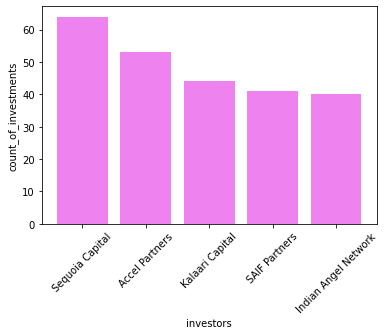

In [167]:
import pandas as pd
import matplotlib.pyplot as plt
#import numpy as np
data=pd.read_csv(r'C:\Users\digvijaysingh.singh\Downloads\startup_funding.csv',encoding="utf8")
df=data.copy()

#now firstly we will drop rows having nan values
df.dropna(subset=['InvestorsName'],inplace=True)

#drop undisclosed investors
df=df[df.InvestorsName!='Undisclosed Investors']
df=df[df.InvestorsName!='Undisclosed investors']
df=df[df.InvestorsName!='Undisclosed Investor']
df=df[df.InvestorsName!='undisclosed investors']
df=df[df.InvestorsName!='undisclosed investor']
df=df[df.InvestorsName!='Undisclosed investor']

# what we have done here is we have splited the investers column value 
# to form new rows
#we will usse pandas.Series.str.split() with regular expression and pandas.Series.explode() to create further rows with each investor name seperately.
df['InvestorsName'] = df['InvestorsName'].str.split(',')
df = df.explode('InvestorsName').reset_index(drop=True)

#now remove extra spaces around names
df.InvestorsName=df.InvestorsName.str.strip()

df=df[df.InvestorsName!='']

a=df.InvestorsName.value_counts()

#print top 5 investors
for i in range(5):
    print(a.index[i],a[i])
    
#adding a graph for viualization
investors=a.index[:5]
count_of_investments=a.values[0:5]
plt.bar(investors,count_of_investments,color='violet')
plt.xticks(rotation=45)
plt.xlabel('investors')
plt.ylabel('count_of_investments')
plt.show()

## Question no.3

Sequoia Capital 48
Accel Partners 47
Kalaari Capital 41
Indian Angel Network 40
Blume Ventures 36


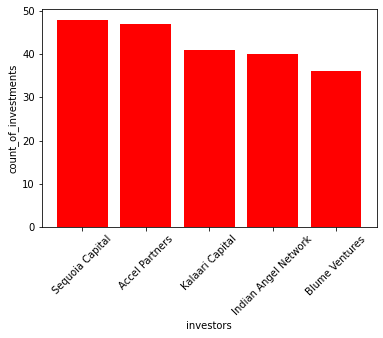

In [168]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data=pd.read_csv(r'C:\Users\digvijaysingh.singh\Downloads\startup_funding.csv',encoding="utf8")
df=data.copy()

#making correction in Startup Names
df.StartupName.replace("Ola Cabs","Ola",inplace=True)
df.StartupName.replace("Olacabs","Ola",inplace=True)
df.StartupName.replace("OyoRooms","Oyo",inplace=True)
df.StartupName.replace("OYO Rooms","Oyo",inplace=True)
df.StartupName.replace("Oyo Rooms","Oyo",inplace=True)
df.StartupName.replace("Oyorooms","Oyo",inplace=True)
df.StartupName.replace("Flipkart.com","Flipkart",inplace=True)
df.StartupName.replace("Paytm Marketplace","Paytm",inplace=True)

df.dropna(subset=['StartupName'],inplace=True)
df.dropna(subset=['InvestorsName'],inplace=True)

#split rows on basis of InvestorsName values
df['InvestorsName'] = df['InvestorsName'].str.split(',')
df = df.explode('InvestorsName').reset_index(drop=True)

#now remove extra spaces
df.InvestorsName=df.InvestorsName.str.strip()

df1=df[['InvestorsName','StartupName']].copy()
df1.drop_duplicates(inplace=True)

df1=df1[df1.InvestorsName!='']

a=df1.InvestorsName.value_counts()

for i in range(5):
    print(a.index[i],a[i])
    
#adding a graph for viualization
investors=a.index[:5]
count_of_investments=a.values[0:5]
plt.bar(investors,count_of_investments,color='red')
plt.xticks(rotation=45)
plt.xlabel('investors')
plt.ylabel('count_of_investments')
plt.show()
    

## Question no.4

Indian Angel Network 33
Rajan Anandan 23
LetsVenture 16
Anupam Mittal 16
Group of Angel Investors 14


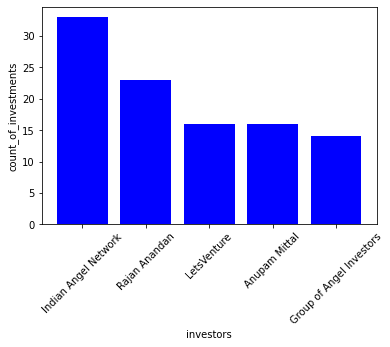

In [169]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data=pd.read_csv(r'C:\Users\digvijaysingh.singh\Downloads\startup_funding.csv',encoding="utf8")
df=data.copy()

#making correction in Startup Names
df.StartupName.replace("Ola Cabs","Ola",inplace=True)
df.StartupName.replace("Olacabs","Ola",inplace=True)
df.StartupName.replace("OyoRooms","Oyo",inplace=True)
df.StartupName.replace("OYO Rooms","Oyo",inplace=True)
df.StartupName.replace("Oyo Rooms","Oyo",inplace=True)
df.StartupName.replace("Oyorooms","Oyo",inplace=True)
df.StartupName.replace("Flipkart.com","Flipkart",inplace=True)
df.StartupName.replace("Paytm Marketplace","Paytm",inplace=True)

#drop undisclosed investors
df=df[df.InvestorsName!='Undisclosed Investors']
df=df[df.InvestorsName!='Undisclosed investors']
df=df[df.InvestorsName!='Undisclosed Investor']
df=df[df.InvestorsName!='undisclosed investors']
df=df[df.InvestorsName!='undisclosed investor']
df=df[df.InvestorsName!='Undisclosed investor']

#making correction in Investment type 
df.InvestmentType.replace('SeedFunding','Seed Funding',inplace=True)
df.InvestmentType.replace('PrivateEquity','Private Equity',inplace=True)
df.InvestmentType.replace('Crowd funding','Crowd Funding',inplace=True)

#now we consider the investment types we need
df=df[(df.InvestmentType=='Seed Funding') | (df.InvestmentType=='Crowd Funding')]

df.dropna(subset=['StartupName'],inplace=True)
df.dropna(subset=['InvestorsName'],inplace=True)

#strip and explode the InvestorsName column
df['InvestorsName'] = df['InvestorsName'].str.split(',')
df = df.explode('InvestorsName').reset_index(drop=True)

#now remove extra spaces
df.InvestorsName=df.InvestorsName.str.strip()


df1=df[['InvestorsName','StartupName']].copy()
df1.drop_duplicates(inplace=True)

df1=df1[df1.InvestorsName!='']

a=df1.InvestorsName.value_counts()

for i in range(5):
    print(a.index[i],a[i])
    
#adding a graph for viualization
investors=a.index[:5]
count_of_investments=a.values[0:5]
plt.bar(investors,count_of_investments,color='blue')
plt.xticks(rotation=45)
plt.xlabel('investors')
plt.ylabel('count_of_investments')
plt.show()
    

## Question no.5

Sequoia Capital 45
Accel Partners 43
Kalaari Capital 35
Blume Ventures 27
SAIF Partners 24


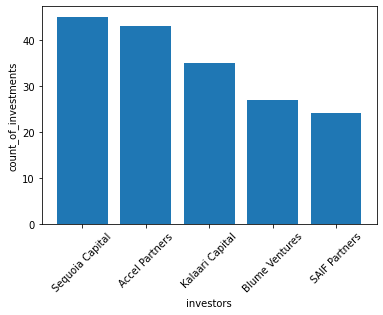

In [170]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data=pd.read_csv(r'C:\Users\digvijaysingh.singh\Downloads\startup_funding.csv',encoding="utf8")
df=data.copy()

#making correction in Startup Names
df.StartupName.replace("Ola Cabs","Ola",inplace=True)
df.StartupName.replace("Olacabs","Ola",inplace=True)
df.StartupName.replace("OyoRooms","Oyo",inplace=True)
df.StartupName.replace("OYO Rooms","Oyo",inplace=True)
df.StartupName.replace("Oyo Rooms","Oyo",inplace=True)
df.StartupName.replace("Oyorooms","Oyo",inplace=True)
df.StartupName.replace("Flipkart.com","Flipkart",inplace=True)
df.StartupName.replace("Paytm Marketplace","Paytm",inplace=True)

#drop undisclosed investors(this is not going to make much difference beacuse none of this type comes in top 5, but for proper process we have done this)
df=df[df.InvestorsName!='Undisclosed Investors']
df=df[df.InvestorsName!='Undisclosed investors']
df=df[df.InvestorsName!='Undisclosed Investor']
df=df[df.InvestorsName!='undisclosed investors']
df=df[df.InvestorsName!='undisclosed investor']
df=df[df.InvestorsName!='Undisclosed investor']

#making correction in Investment type 
df.InvestmentType.replace('SeedFunding','Seed Funding',inplace=True)
df.InvestmentType.replace('PrivateEquity','Private Equity',inplace=True)
df.InvestmentType.replace('Crowd funding','Crowd Funding',inplace=True)

#now we consider the investment types we need
df=df[(df.InvestmentType=='Private Equity')]

df.dropna(subset=['StartupName'],inplace=True)
df.dropna(subset=['InvestorsName'],inplace=True)

# split and explode the rows on basis of InvestorsName
df['InvestorsName'] = df['InvestorsName'].str.split(',')
df = df.explode('InvestorsName').reset_index(drop=True)

#now remove extra spaces
df.InvestorsName=df.InvestorsName.str.strip()

df1=df[['InvestorsName','StartupName']].copy()
df1.drop_duplicates(inplace=True)

df1=df1[df1.InvestorsName!='']

a=df1.InvestorsName.value_counts()

for i in range(5):
    print(a.index[i],a[i])
    
#adding a graph for viualization
investors=a.index[:5]
count_of_investments=a.values[0:5]
plt.bar(investors,count_of_investments)
plt.xticks(rotation=45)
plt.xlabel('investors')
plt.ylabel('count_of_investments')
plt.show()
    